#### Q 1: Take any data from the internet and form a supervised machine learning problem around it. 

Dataset taken for this problem is the Boston housing prices. It comes from UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston. The goal is to develop a model that will predict the price of the houses. The dataset will be split into training and testing dataset. The training dataset will be used to train the model using one of the supervised learning algorithm (for example : linear regression). Once a model has been trained on a given training set of data, it can now be used to make predictions on new sets of input data (testing dataset). These predictions can be used to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from pandas.plotting import register_matplotlib_converters
sns.set()
plt.rcParams["figure.figsize"] = [16,9]

In [2]:
df=pd.read_csv("Air_passenger.csv")
df['Month']=pd.to_datetime(df['Month'], infer_datetime_format=True)
indf=df.set_index(['Month'])
indf.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
series = pd.read_csv("Air_passenger.csv", header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t','t+1']
print(dataframe.head(5))

       t  t+1
0    NaN  112
1  112.0  118
2  118.0  132
3  132.0  129
4  129.0  121


#### Q 2: What is the difference between a dataframe and a series? What are the different types of datatypes present in Pandas?

A DataFrame in Pandas is 2-dimensional whereas a Pandas Series in 1-dimensional. A single column dataframe can be considered to be a Series. Also, each column of a dataframe can be converted into series.
Series cannot have a name for its column but the columns can be named in Dataframe.

Different types of datatypes in Pandas :
1. object - strings or combination of numbers and text
2. int64 - integer numbers
3. float64 - floating point numbers
4. bool - True or Flase
5. datetime64 - Date and time values

## Time Series Analysis

#### Q 3: Explain all the metrics which I have written codes about. For example, explain what did you infer from the code df.describe()

In [4]:
df.shape

(144, 2)

'shape' is a property of Dataframe that returns a tuple. It represents the dimension of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


info() function of Dataframe returns a summary of it. It includes the data types of the columns, number of entries and the memory usage.

In [6]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


describe() gives a statistics summary of the dataframe columns. It gives summary of only those columns that have int and float data type 

## Visualization

C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


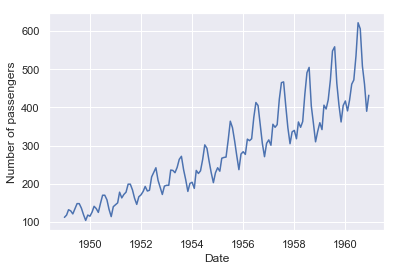

In [7]:
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.plot(series)

Just by looking at the above data, you can infer that the output variable is not constant with respect to time and it keep changing (increasing in fact). The increment is not constant, it decreases sometimes or increases. We will have to tranform this series a bit to get desired outputs. We can also make a histogram to see where our data lies.

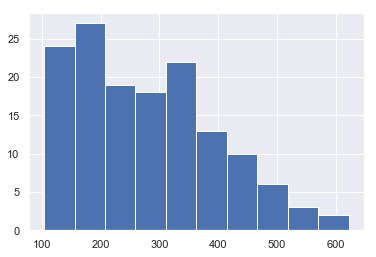

In [8]:
series.hist()
plt.show()

The data shown above has a skew, towards the right. We can make this a normal distribution with some transformation. Now let us make a boxplot:

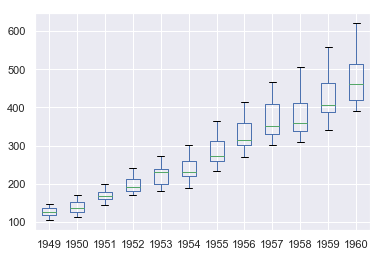

In [9]:
from pandas import DataFrame
from pandas import Grouper
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

## Preprocessing the temperature dataset

In [10]:
df=pd.read_csv("testset.csv")
df.head()

,datetime,Temperature
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


### Q 5: Read about the functions used in the code and write about it 

1. read_csv() : It is an important pandas function to read csv files and do operations on those files.
2. to_datetime() : When a csv file is imported the objects in the file are read as a string object. Hence it’s very tough to perform operations like Time difference on a string rather a Date Time object. to_datetime() method helps to convert string Date time into Python Date time object.
3. head() : The head() function is used to get the first n rows. By default the value of n is 5
4. hist() : Used to plot a histogram
5. plot() : Plotting a graph on the screen
6. boxplot() : Used to plot a boxplot

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))
df['datetime'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime, dtype: datetime64[ns]

In [12]:
df = df.set_index('datetime')
df.head()

,Temperature
datetime,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


In [13]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.weekday_name
df.head()

,Temperature,Year,Month,Weekday Name
datetime,,,,
1996-11-01 11:00:00,30.0,1996,11,Friday
1996-11-01 12:00:00,28.0,1996,11,Friday
1996-11-01 13:00:00,24.0,1996,11,Friday
1996-11-01 14:00:00,24.0,1996,11,Friday
1996-11-01 16:00:00,23.0,1996,11,Friday


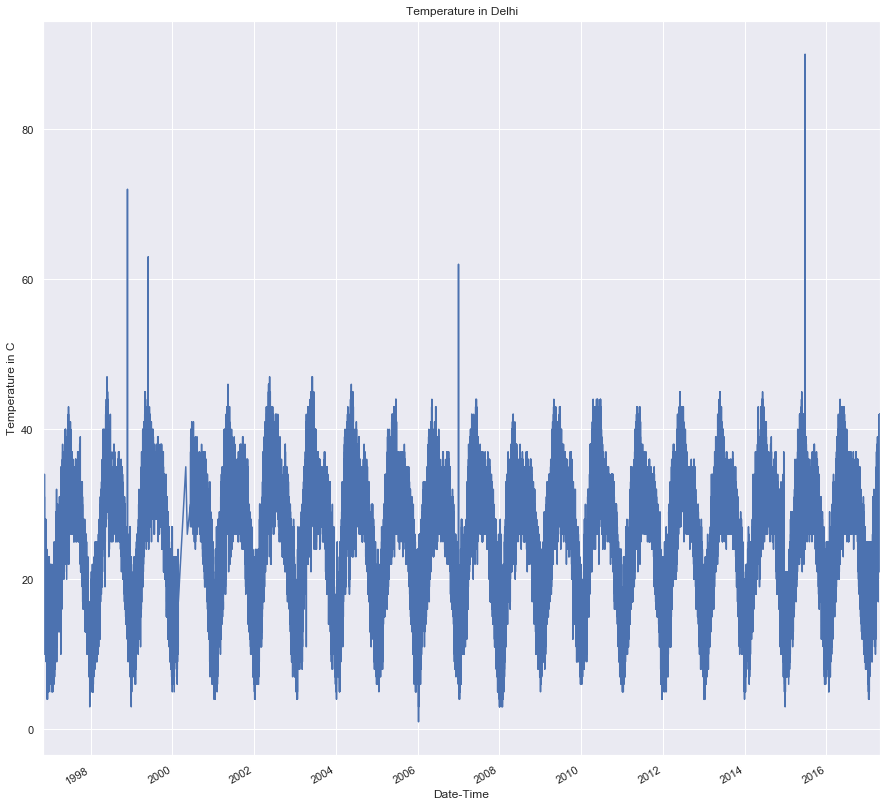

In [14]:
fig, ax = plt.subplots()
df['Temperature'].plot(figsize=(15,15),ax=ax)
ax.set_xlabel('Date-Time')
ax.set_ylabel('Temperature in C')
ax.set_title('Temperature in Delhi')
plt.show()

In [15]:
df = df['2001':]

### Q 6: Analyze the mean temperature data which will be attached with the files on Github

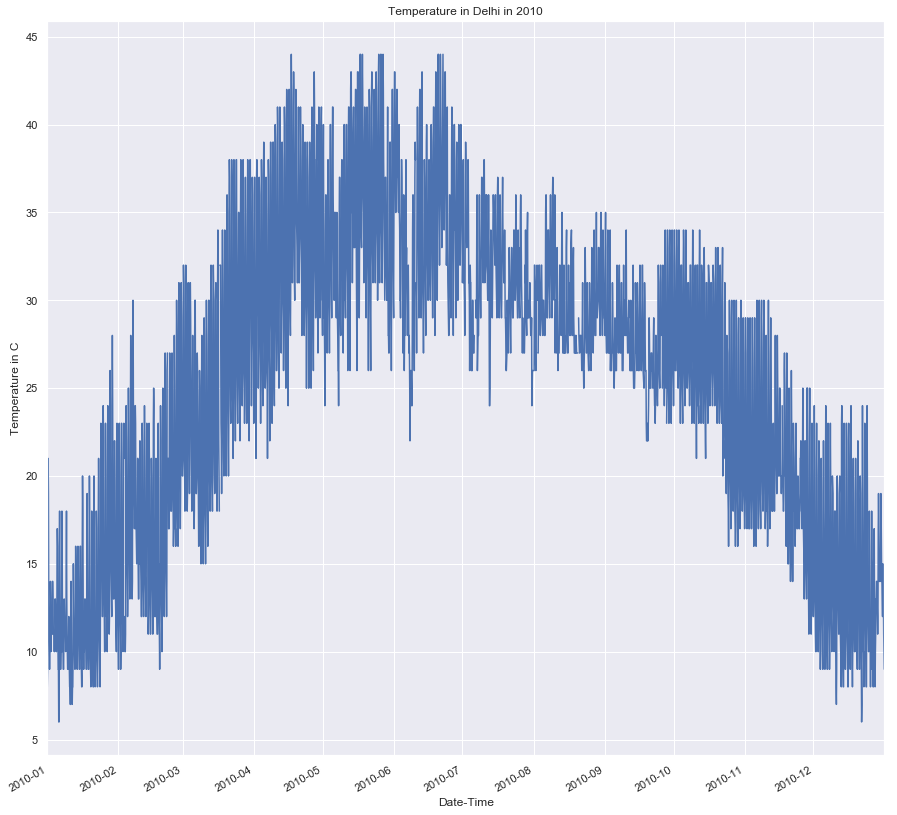

In [16]:
# Analyze temperature for a particular year
fig, ax = plt.subplots()
df.loc['2010','Temperature'].plot(figsize=(15,15),ax=ax)
ax.set_xlabel('Date-Time')
ax.set_ylabel('Temperature in C')
ax.set_title('Temperature in Delhi in 2010')
plt.show()

It can be seen that the temperature is the highest in the months April,May,June. It is coldest in the months of December,January and February

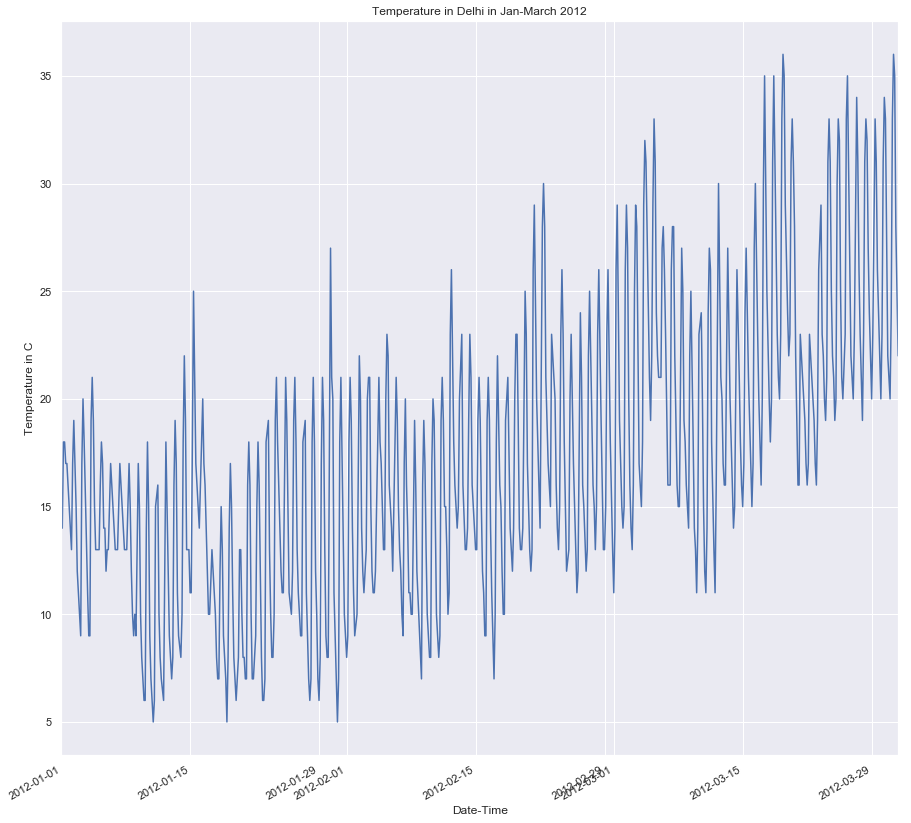

In [17]:
fig, ax = plt.subplots()
df.loc['2012-01':'2012-03','Temperature'].plot(figsize=(15,15),ax=ax)
ax.set_xlabel('Date-Time')
ax.set_ylabel('Temperature in C')
ax.set_title('Temperature in Delhi in Jan-March 2012')
plt.show()

It can be observed that the temperature gradually increases from January to March as the seasons change from winter to summer.

Text(0.5, 1.0, 'Temperature in Delhi')

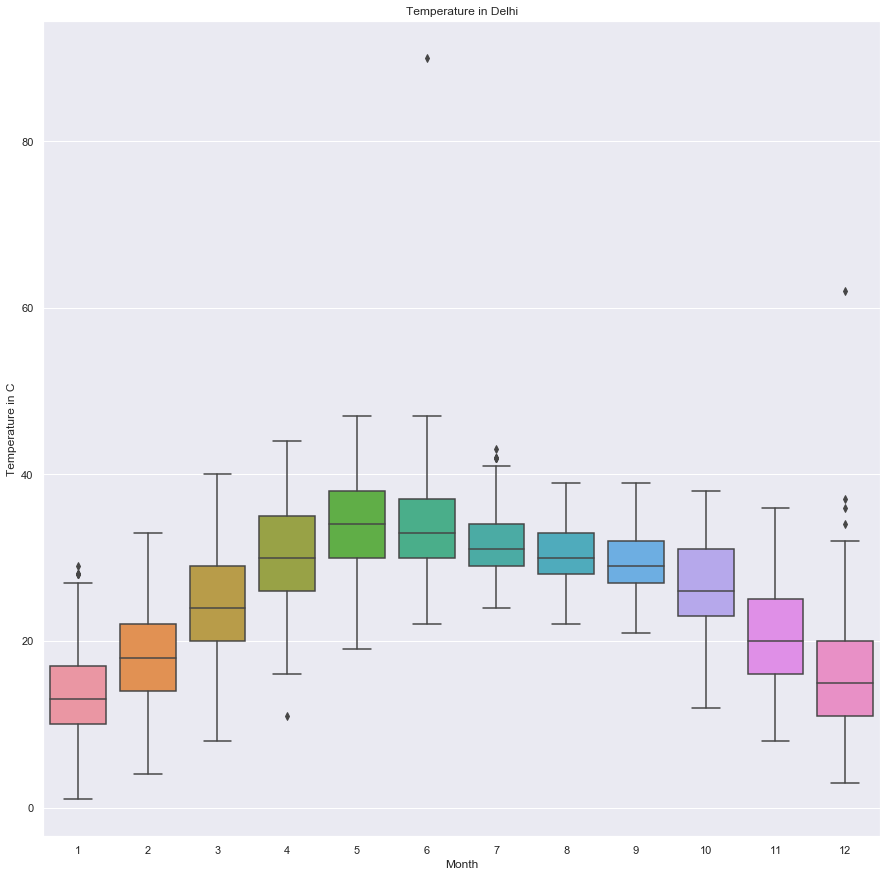

In [18]:
# boxplot for the temperatue throughout the 12 months
fig, ax = plt.subplots(1,1,figsize=(15, 15))
sns.boxplot(data=df, x='Month', y='Temperature', ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Temperature in C')
ax.set_title('Temperature in Delhi')

In [19]:
# resampling the data to a weekly time series
df_weekly_mean = df['Temperature'].resample('W').mean()
df_weekly_mean.head(3)

datetime
2001-01-07    11.367470
2001-01-14    10.339506
2001-01-21    12.478261
Freq: W-SUN, Name: Temperature, dtype: float64

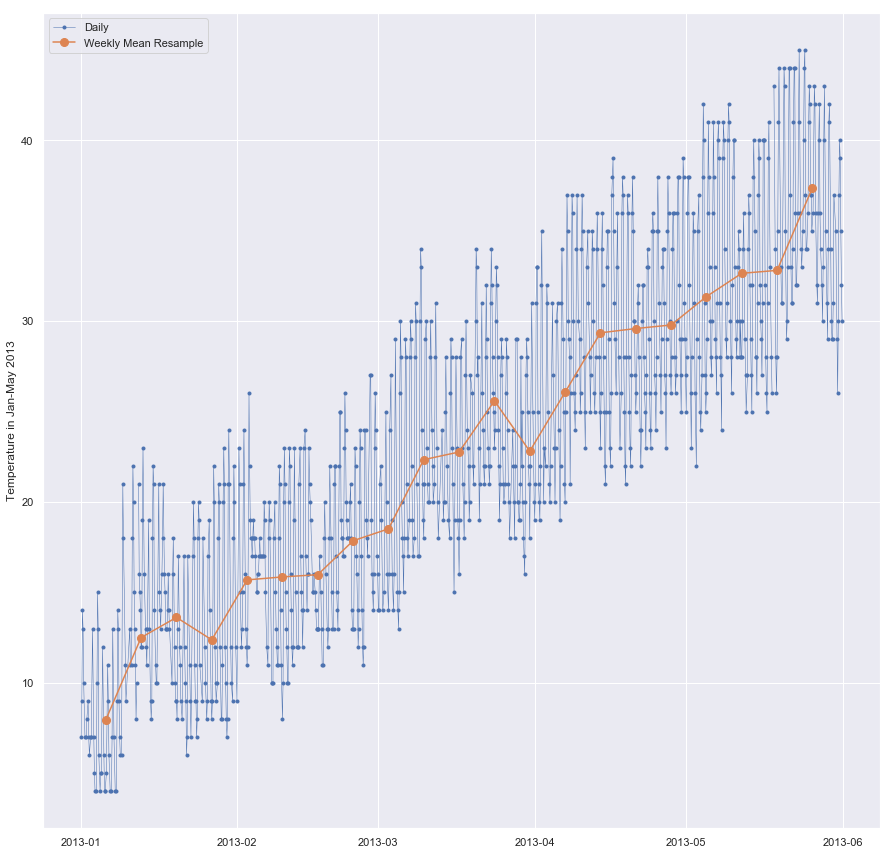

In [21]:
# Start and end of the date range to extract
start, end = '2013-01', '2013-05'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(df.loc[start:end, 'Temperature'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_weekly_mean.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature in Jan-May 2013')
ax.legend();

The weekly time series is smoother than the daily one as the higher frequency variability has been averaged out in the resampling